<a href="https://colab.research.google.com/github/6303757722/PDS_Assignment-3_4/blob/main/Question_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**a) set a seed (to ensure work reproducibility) and take a random sample of 25 observations and
find the mean Glucose and highest Glucose values of this sample and compare these statistics
with the population statistics of the same variable. You should use charts for this comparison.**

In [2]:
import pandas as pd
data_set = pd.read_csv("/content/diabetes.csv")

In [3]:
# a) Random sample of 25 observations
import numpy as np
np.random.seed(42)
sample_population = data_set.sample(n=25)

sample_population.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
668,6,98,58,33,190,34.0,0.430,43,0
324,2,112,75,32,0,35.7,0.148,21,0
624,2,108,64,0,0,30.8,0.158,21,0
690,8,107,80,0,0,24.6,0.856,34,0
473,7,136,90,0,0,29.9,0.210,50,0


In [4]:
# Population statistics for Glucose
population_mean = data_set['Glucose'].mean()
population_max = data_set['Glucose'].max()
print("population mean =",population_mean)
print("population max =",population_max)

population mean = 120.89453125
population max = 199


In [5]:
# Sample statistics for Glucose
sample_mean = sample_population['Glucose'].mean()
sample_max = sample_population['Glucose'].max()
print("sample mean =",sample_mean)
print("sample max =",sample_max)

sample mean = 116.64
sample max = 183


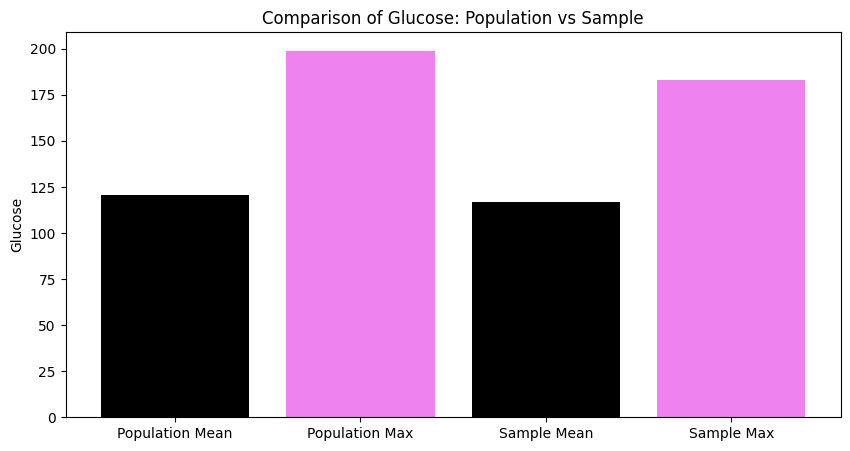

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(['Population Mean', 'Population Max', 'Sample Mean', 'Sample Max'], [population_mean, population_max, sample_mean, sample_max], color=['black', 'violet', 'black', 'violet'])
plt.title('Comparison of Glucose: Population vs Sample')
plt.ylabel('Glucose')
plt.show()

**b) Find the 98th percentile of BMI of your sample and the population and compare the results using charts.**

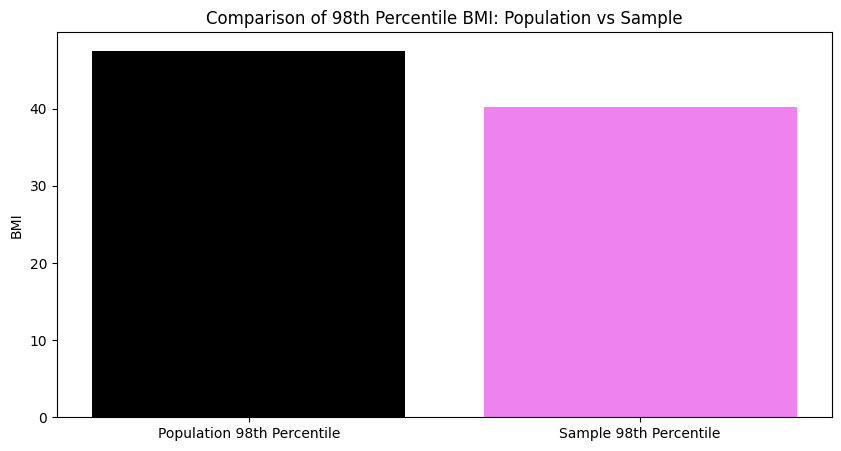

In [7]:
population_percentile = np.percentile(data_set['BMI'], 98)
sample_percentile = np.percentile(sample_population['BMI'], 98)

plt.figure(figsize=(10, 5))
plt.bar(['Population 98th Percentile', 'Sample 98th Percentile'], [population_percentile, sample_percentile], color=['black', 'violet'])
plt.title('Comparison of 98th Percentile BMI: Population vs Sample')
plt.ylabel('BMI')
plt.show()

**c) Using bootstrap (replace= True), create 500 samples (of 150 observation each) from the population and find the average mean, standard deviation and percentile for BloodPressure and compare this with these statistics from the population for the same variable. Again, you should create charts for this comparison. Report on your findings.**

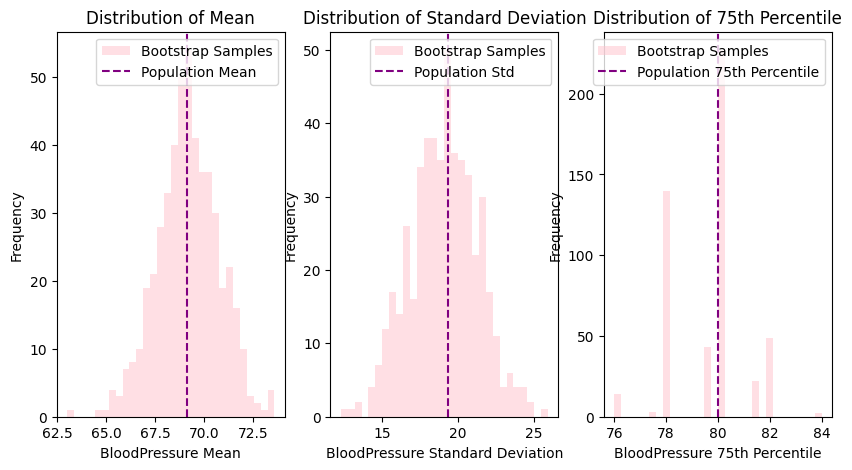

In [8]:
bootstrap_means = []
bootstrap_stds = []
bootstrap_percentiles = []

for _ in range(500):
    bootstrap_sample = data_set.sample(n=150, replace=True)
    bootstrap_means.append(bootstrap_sample['BloodPressure'].mean())
    bootstrap_stds.append(bootstrap_sample['BloodPressure'].std())
    bootstrap_percentiles.append(np.percentile(bootstrap_sample['BloodPressure'], 75))

# Population statistics for BloodPressure
population_mean_bp = data_set['BloodPressure'].mean()
population_std_bp = data_set['BloodPressure'].std()
population_percentile_bp = np.percentile(data_set['BloodPressure'], 75)

# Comparison using charts
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.hist(bootstrap_means, bins=30, color='pink', alpha=0.5, label='Bootstrap Samples')
plt.axvline(x=population_mean_bp, color='purple', linestyle='--', label='Population Mean')
plt.title('Distribution of Mean')
plt.xlabel('BloodPressure Mean')
plt.ylabel('Frequency')
plt.legend()



plt.subplot(1, 3, 2)
plt.hist(bootstrap_stds, bins=30, color='pink', alpha=0.5, label='Bootstrap Samples')
plt.axvline(x=population_std_bp, color='purple', linestyle='--', label='Population Std')
plt.title('Distribution of Standard Deviation')
plt.xlabel('BloodPressure Standard Deviation')
plt.ylabel('Frequency')
plt.legend()



plt.subplot(1, 3, 3)
plt.hist(bootstrap_percentiles, bins=30, color='pink', alpha=0.5, label='Bootstrap Samples')
plt.axvline(x=population_percentile_bp, color='purple', linestyle='--', label='Population 75th Percentile')
plt.title('Distribution of 75th Percentile')
plt.xlabel('BloodPressure 75th Percentile')
plt.ylabel('Frequency')
plt.legend()
plt.show()